Средняя температура для России по векам:
18 век: 3.93 градусов Цельсия
19 век: 2.91 градусов Цельсия
20 век: 3.34 градусов Цельсия
21 век: 4.77 градусов Цельсия
Средняя температура для Белгорода по векам:
18 век: 5.73 градусов Цельсия
19 век: 5.71 градусов Цельсия
20 век: 6.29 градусов Цельсия
21 век: 7.93 градусов Цельсия
Максимальная среднегодовая температура в городе Абакан: 2.61
Минимальная среднегодовая температура в городе Абакан: -2.78
Максимальная среднемесячная температура в городе Абакан: 18.5
Минимальная среднемесячная температура в городе Абакан: -20.81
Максимальная среднемесячная температура в городе Архангельск (18.252) была зафиксирована 1960-07-01
Минимальная среднемесячная температура в городе Архангельск (-22.188) была зафиксирована 1985-01-01
Максимальная среднемесячная температура в городе Челябинск (23.259) была зафиксирована 1989-07-01
Минимальная среднемесячная температура в городе Челябинск (-25.776) была зафиксирована 1969-01-01


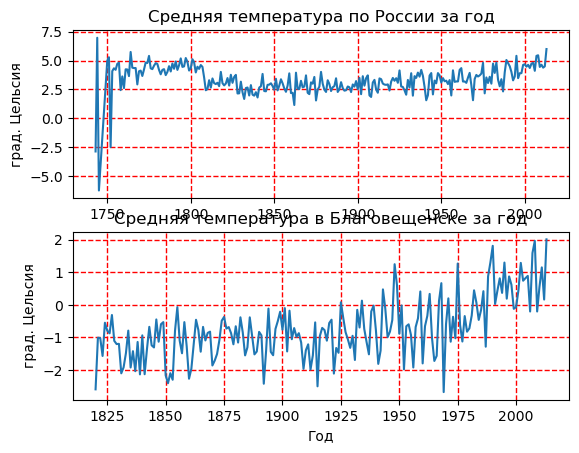

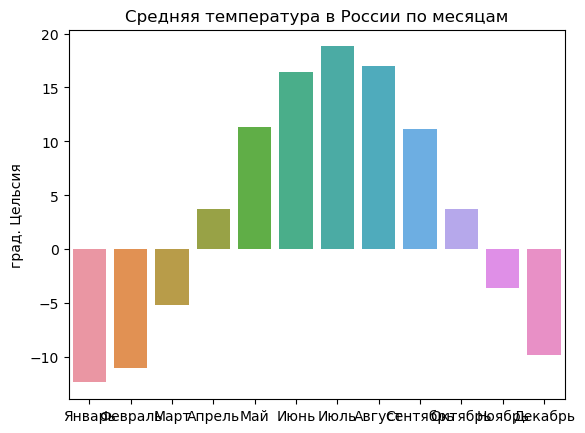

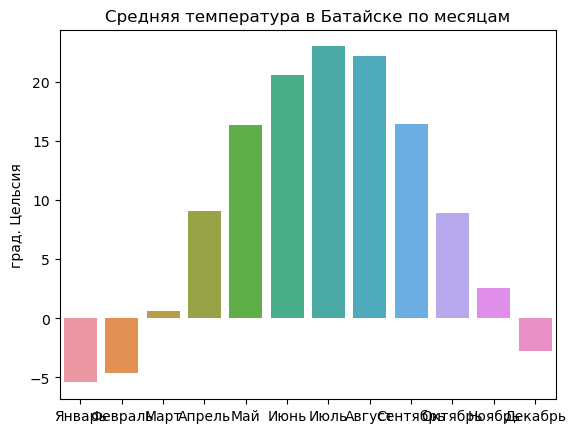

In [3]:
# Задания.
#+1. Загрузить датасет, расположенный по адресу: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data
#+2. С помощью встроенных функций работы с файлами формата *.csv открыть файл GlobalLandTemperaturesByCity.csv
#+3. Рассчитать среднее значение температуры (поле AverageTemperature) по столетиям для России.
#+4. Рассчитать среднее значение температуры (поле AverageTemperature) по столетиям для города Белгород.
#+5. Рассчитать максимальную и минимальную средние месячную и годовую температуры для города Абакан.
#+6. Определить даты, когда были зафиксированы максимальная и минимальная средние температуры в городе Архангельск.
#+7. Построить график изменения средней температуры по годам для России за все время измерений.
#+8. Построить график изменения средней температуры по годам для города Благовещенск за все время измерений.
#+9. Рассчитать среднюю месячную температуры для России за все время измерений и построить гистограмму распределения.
#+10. Рассчитать среднюю месячную температуры для города Батайск за все время измерений и построить гистограмму распределения.
# Результат оформить в виде jupiter ноутбука и разместить в репозитарии github

import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
import math
import seaborn

# Расчеты для России
def calc_mean_temp_year_cent(country = '', city = ''):# Функция расчета средней температуры по годам и средней температуры века в заданном регионе
    # Загрузка необходимых данных из датасета
    if country and city:
        country = ''
    if country:
        time_AverageTemperature_region = list(data['dt'][data['Country'] == country])  # Дата фиксации средней температуры для страны
        AverageTemperature_region = list(data['AverageTemperature'][data['Country'] == country])  # Значение средней температуры для страны на момент фиксации
    elif city:
        time_AverageTemperature_region = list(data['dt'][data['City'] == city])  # Дата фиксации средней температуры для города
        AverageTemperature_region = list(data['AverageTemperature'][data['City'] == city])  # Значение средней температуры для города на момент фиксации
    else:
        print('Ошибка. Введите страну или город')

    years_region = [] # годы
    for i in range(len(time_AverageTemperature_region)):
        years_region.append(int(time_AverageTemperature_region[i].split('-')[0])) # Выделение из даты значений годов
    different_years_region = list(set(years_region)) # Преобразование множества в список для создания уникальных значений годов

    AverageTemperature_region_year = [] # Средняя температура по годам для региона
    AverageTemperature_region_ohyear = [] # Средняя температура по векам для региона
    sum_temp_18cent_region = 0 # Сумма среднегодовых температур за 18 век для региона
    sum_temp_19cent_region = 0 # Сумма среднегодовых температур за 19 век для региона
    sum_temp_20cent_region = 0 # Сумма среднегодовых температур за 20 век для региона
    sum_temp_21cent_region = 0 # Сумма среднегодовых температур за 21 век для региона
    count18cent_region = 0 # Счетчик годов за 18 век
    count19cent_region = 0 # Счетчик годов за 19 век
    count20cent_region = 0 # Счетчик годов за 20 век
    count21cent_region = 0 # Счетчик годов за 21 век

    for year in different_years_region:
        idx = np.argwhere(np.array(years_region) == year).flatten() # Индексы одинаковых годов в списке years_region
        sum_temp_year_region = 0
        count = 0
        for i in range(len(idx)):
            if not math.isnan(AverageTemperature_region[idx[i]]):# В случае если значение температуры известно (не nan)
                sum_temp_year_region = sum_temp_year_region + AverageTemperature_region[idx[i]] # Сумма всех температур для данного года для региона
                count += 1 # Увеличение счетчика температур для данного года для региона
        if count != 0:
            AverageTemperature_region_year.append(sum_temp_year_region/count) # Среднегодовая температура для региона по годам
            if (year > 1700) and (year <= 1800):
                sum_temp_18cent_region = sum_temp_18cent_region + (sum_temp_year_region/count)
                count18cent_region += 1
            elif (year > 1800) and (year <= 1900):
                sum_temp_19cent_region = sum_temp_19cent_region + (sum_temp_year_region/count)
                count19cent_region += 1
            elif (year > 1900) and (year <= 2000):
                sum_temp_20cent_region = sum_temp_20cent_region + (sum_temp_year_region/count)
                count20cent_region += 1
            else:
                sum_temp_21cent_region = sum_temp_21cent_region + (sum_temp_year_region/count)
                count21cent_region += 1
        else:
            AverageTemperature_region_year.append(1000)  # Среднегодовая температура для региона неизвестна для этого года

    # Средняя температура по векам для региона
    oh_years = np.array([18,19,20,21])

    if count18cent_region != 0:
        AverageTemperature_region_ohyear.append(sum_temp_18cent_region/count18cent_region)
    else:
        AverageTemperature_region_ohyear.append(1000)

    if count19cent_region != 0:
        AverageTemperature_region_ohyear.append(sum_temp_19cent_region/count19cent_region)
    else:
        AverageTemperature_region_ohyear.append(1000)

    if count20cent_region != 0:
        AverageTemperature_region_ohyear.append(sum_temp_20cent_region/count20cent_region)
    else:
        AverageTemperature_region_ohyear.append(1000)

    if count21cent_region != 0:
        AverageTemperature_region_ohyear.append(sum_temp_21cent_region/count21cent_region)
    else:
        AverageTemperature_region_ohyear.append(1000)

    # Удаление значений unckown в списках итерационное
    idx_unknown = np.argwhere(np.array(AverageTemperature_region_year) == 1000).flatten()# Индексы значений unknown в списке AverageTemperature_region_year
    while (len(idx_unknown) > 1):
        idx_unknown = np.argwhere(np.array(AverageTemperature_region_year) == 1000).flatten()
        different_years_region.pop(idx_unknown[0])
        AverageTemperature_region_year.pop(idx_unknown[0])

    idx_unknown = np.argwhere(np.array(AverageTemperature_region_ohyear) == 1000).flatten()  # Индексы значений unknown в списке AverageTemperature_region_year
    while (len(idx_unknown) > 1):
        idx_unknown = np.argwhere(np.array(AverageTemperature_region_ohyear) == 1000).flatten()
        oh_years.pop(idx_unknown[0])
        AverageTemperature_region_ohyear.pop(idx_unknown[0])

    return different_years_region, AverageTemperature_region_year, oh_years, AverageTemperature_region_ohyear

def calc_mean_temp_month(country = '', city = ''): # Функция расчета средней температуры по месяцам в заданном регионе
    # Загрузка необходимых данных из датасета
    if country and city:
        country = ''
    if country:
        time_AverageTemperature_region = list(data['dt'][data['Country'] == country])  # Дата фиксации средней температуры для страны
        AverageTemperature_region = list(data['AverageTemperature'][data['Country'] == country])  # Значение средней температуры для страны на момент фиксации
    elif city:
        time_AverageTemperature_region = list(data['dt'][data['City'] == city])  # Дата фиксации средней температуры для города
        AverageTemperature_region = list(data['AverageTemperature'][data['City'] == city])  # Значение средней температуры для города на момент фиксации
    else:
        print('Ошибка. Введите страну или город')

    month_region = []  # месяцы
    for i in range(len(time_AverageTemperature_region)):
        month_region.append(int(time_AverageTemperature_region[i].split('-')[1]))  # Выделение из даты значений месяцев
    different_months_region = list(set(month_region))  # Преобразование множества в список для создания уникальных значений месяцев

    AverageTemperature_region_month = []

    for month in different_months_region:
        idx = np.argwhere(np.array(month_region) == month).flatten() # Индексы одинаковых месяцев в списке month_region
        sum_temp_month_region = 0
        count = 0
        for i in range(len(idx)):
            if not math.isnan(AverageTemperature_region[idx[i]]):# В случае если значение температуры известно (не nan)
                sum_temp_month_region = sum_temp_month_region + AverageTemperature_region[idx[i]] # Сумма всех температур для данного месяца для региона
                count += 1 # Увеличение счетчика температур для данного месяца для региона
        if count != 0:
            AverageTemperature_region_month.append(sum_temp_month_region/count) # Среднемесячная температура для региона по месяцам
        else:
            AverageTemperature_region_month.append(1000)  # Среднемесячная температура для региона неизвестна для этого месяца

    # Удаление значений unckown в списках итерационное
    idx_unknown = np.argwhere(np.array(AverageTemperature_region_month) == 1000).flatten()# Индексы значений unknown в списке AverageTemperature_region_year
    while (len(idx_unknown) > 1):
        idx_unknown = np.argwhere(np.array(AverageTemperature_region_month) == 1000).flatten()
        different_months_region.pop(idx_unknown[0])
        AverageTemperature_region_month.pop(idx_unknown[0])

    return different_months_region, AverageTemperature_region_month

if __name__ == "__main__":
    data = pd.read_csv('GlobalLandTemperaturesByCity.csv')  # Загрузка датасета

    [year_Russia, meanTemp_Russia_year, cent_Russia, meanTemp_Russia_cent] = calc_mean_temp_year_cent(country='Russia',city='')
    [year_Belgorod, meanTemp_Belgorod_year, cent_Belgorod, meanTemperature_Belgorod_cent] = calc_mean_temp_year_cent(country='',city='Belgorod')
    [year_Blagoveshchensk, meanTemp_Blagoveshchensk_year, cent_Blagoveshchensk, meanTemperature_Blagoveshchensk_cent] = calc_mean_temp_year_cent(country='', city='Blagoveshchensk')
    [year_Abakan, meanTemp_Abakan_year, cent_Abakan,meanTemperature_Abakan_cent] = calc_mean_temp_year_cent(country='', city='Abakan')
    [month_Russia, meanTemp_Russia_month] = calc_mean_temp_month(country='Russia', city='')
    [month_Bataysk, meanTemp_Bataysk_month] = calc_mean_temp_month(country='', city='Bataysk')
    [month_Chelyabinsk, meanTemp_Chelyabinsk_month] = calc_mean_temp_month(country='', city='Chelyabinsk')
    [month_Abakan, meanTemp_Abakan_month] = calc_mean_temp_month(country='', city='Abakan')


    print(f'Средняя температура для России по векам:')
    for i in range(len(cent_Russia)):
        print(f'{cent_Russia[i]} век: {round(meanTemp_Russia_cent[i],2)} градусов Цельсия')
    print(f'Средняя температура для Белгорода по векам:')
    for i in range(len(cent_Belgorod)):
        print(f'{cent_Belgorod[i]} век: {round(meanTemperature_Belgorod_cent[i], 2)} градусов Цельсия')
    print(f'Максимальная среднегодовая температура в городе Абакан: {round(max(meanTemp_Abakan_year),2)}')
    print(f'Минимальная среднегодовая температура в городе Абакан: {round(min(meanTemp_Abakan_year),2)}')
    print(f'Максимальная среднемесячная температура в городе Абакан: {round(max(meanTemp_Abakan_month), 2)}')
    print(f'Минимальная среднемесячная температура в городе Абакан: {round(min(meanTemp_Abakan_month), 2)}')

    # Даты когда зафиксированы максимальная и минимальная температуры в городе Архангельск:
    time_AverageTemperature_Arkhangelsk = list(data['dt'][data['City'] == 'Arkhangelsk'])  # Дата фиксации средней температуры для города
    AverageTemperature_Arkhangelsk = list(data['AverageTemperature'][data['City'] == 'Arkhangelsk'])  # Значение средней температуры для города на момент фиксации
    for i in range(len(AverageTemperature_Arkhangelsk)):
        if AverageTemperature_Arkhangelsk[i] == min(AverageTemperature_Arkhangelsk):
            index_min_temp = i
        if AverageTemperature_Arkhangelsk[i] == max(AverageTemperature_Arkhangelsk):
            index_max_temp = i
    print(f'Максимальная среднемесячная температура в городе Архангельск ({max(AverageTemperature_Arkhangelsk)}) была зафиксирована {time_AverageTemperature_Arkhangelsk[index_max_temp]}')
    print(f'Минимальная среднемесячная температура в городе Архангельск ({min(AverageTemperature_Arkhangelsk)}) была зафиксирована {time_AverageTemperature_Arkhangelsk[index_min_temp]}')

    # Даты когда зафиксированы максимальная и минимальная температуры в городе Челябинск:
    time_AverageTemperature_Chelyabinsk = list(data['dt'][data['City'] == 'Chelyabinsk'])  # Дата фиксации средней температуры для города
    AverageTemperature_Chelyabinsk = list(data['AverageTemperature'][data['City'] == 'Chelyabinsk'])  # Значение средней температуры для города на момент фиксации
    for i in range(len(AverageTemperature_Chelyabinsk)):
        if AverageTemperature_Chelyabinsk[i] == min(AverageTemperature_Chelyabinsk):
            index_min_temp = i
        if AverageTemperature_Chelyabinsk[i] == max(AverageTemperature_Chelyabinsk):
            index_max_temp = i
    print(f'Максимальная среднемесячная температура в городе Челябинск ({max(AverageTemperature_Chelyabinsk)}) была зафиксирована {time_AverageTemperature_Chelyabinsk[index_max_temp]}')
    print(f'Минимальная среднемесячная температура в городе Челябинск ({min(AverageTemperature_Chelyabinsk)}) была зафиксирована {time_AverageTemperature_Chelyabinsk[index_min_temp]}')

    # Построение графиков
    plt.clf()
    plt.figure(1)
    plt.subplot(2, 1, 1)
    plt.plot(year_Russia, meanTemp_Russia_year)
    plt.grid(color='red', linewidth=1, linestyle='--')
    #plt.yticks([-100, 0, +100])
    plt.ylabel('град. Цельсия')
    plt.title('Средняя температура по России за год')
    plt.subplot(2, 1, 2)
    plt.plot(year_Blagoveshchensk, meanTemp_Blagoveshchensk_year)
    plt.grid(color='red', linewidth=1, linestyle='--')
    plt.xlabel('Год')
    plt.ylabel('град. Цельсия')
    plt.title('Средняя температура в Благовещенске за год')

    months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
    plt.figure(2)
    plt.ylabel('град. Цельсия')
    seaborn.barplot(x = months, y = meanTemp_Russia_month)
    plt.title('Средняя температура в России по месяцам')
    plt.figure(3)
    plt.ylabel('град. Цельсия')
    seaborn.barplot(x = months, y = meanTemp_Bataysk_month)
    plt.title('Средняя температура в Батайске по месяцам')
    plt.show()